In [1]:
import matplotlib.pyplot as plt

from livae.utils import load_image_from_h5
from livae.data import PatchDataset

%load_ext autoreload
%autoreload 2

In [2]:
images = []

# open data files and load all h5 files
data_dir = "../data/"
file_names = [
    "HAADF1.h5",
    "HAADF2.h5",
    "HAADF3.h5",
]
for file_name in file_names:
    file_path = data_dir + file_name
    image = load_image_from_h5(file_path, 'Measurement_000/Channel_000/HAADF/HAADF')
    images.append(image)
    print(f"Loaded {file_name} with shape {image.shape}")

Loaded HAADF1.h5 with shape (2048, 2048)
Loaded HAADF2.h5 with shape (2048, 2048)
Loaded HAADF3.h5 with shape (2048, 2048)


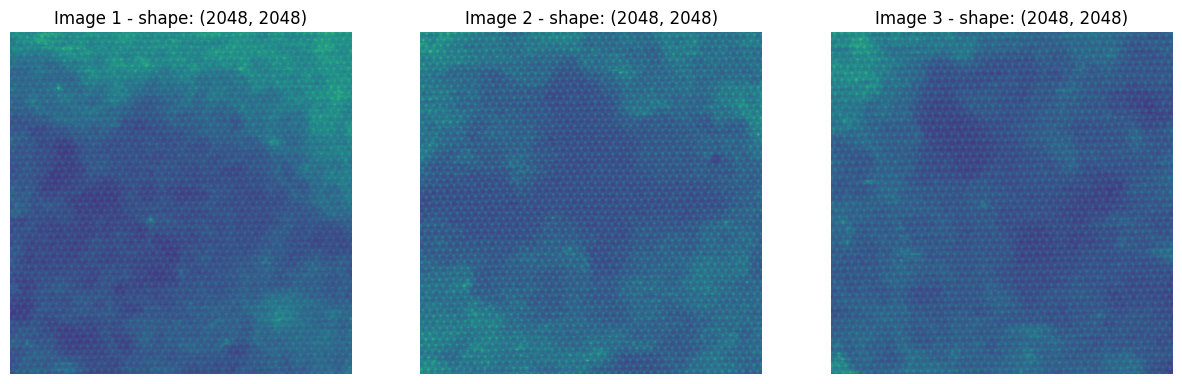

In [3]:
fig = plt.figure(figsize=(15, 5))
for i, image in enumerate(images):
    ax = fig.add_subplot(1, len(images), i + 1)
    ax.imshow(image)
    ax.set_title(f"Image {i+1} - shape: {image.shape}")
    ax.axis('off')
plt.show()

In [4]:
ds = PatchDataset(images, patch_size=64)
print(f"Created PatchDataset with {len(ds)} patches")

Created PatchDataset with 15519 patches


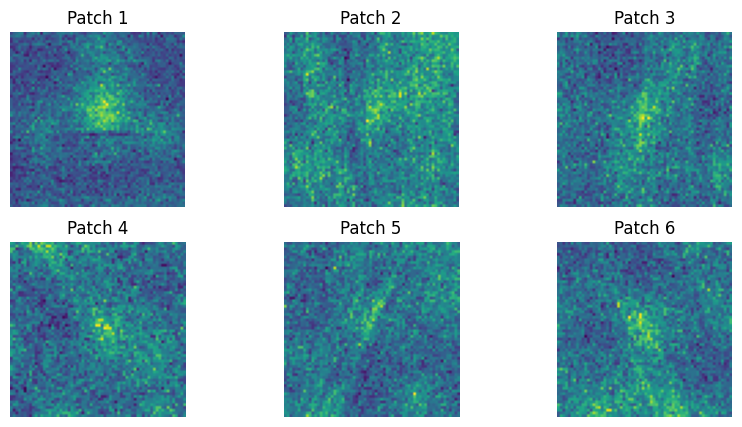

In [5]:
fig = plt.figure(figsize=(10, 5))
for i in range(6):
    patch = ds[i].squeeze()
    ax = fig.add_subplot(2, 3, i + 1)
    ax.imshow(patch)
    ax.set_title(f"Patch {i+1}")
    ax.axis('off')
plt.show()